In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Driver Acceptance Data

In [3]:
pay_df = pd.read_csv('datasets/driverAcceptanceData - driverAcceptanceData.csv', index_col=0)
pay_df['profit'] = 30.0 - pay_df['PAY']

## Plotting the distribution

First we plot the distribution of the accepted rides and rejected rides. Driver behaviour on accepting rides can be easily understood; the higher the compensation (offered pay), the greater the acceptance rate, and vice-versa on low compensation. The distribution of offered compensation follows a normal distribution, with the mean at ~$25. 

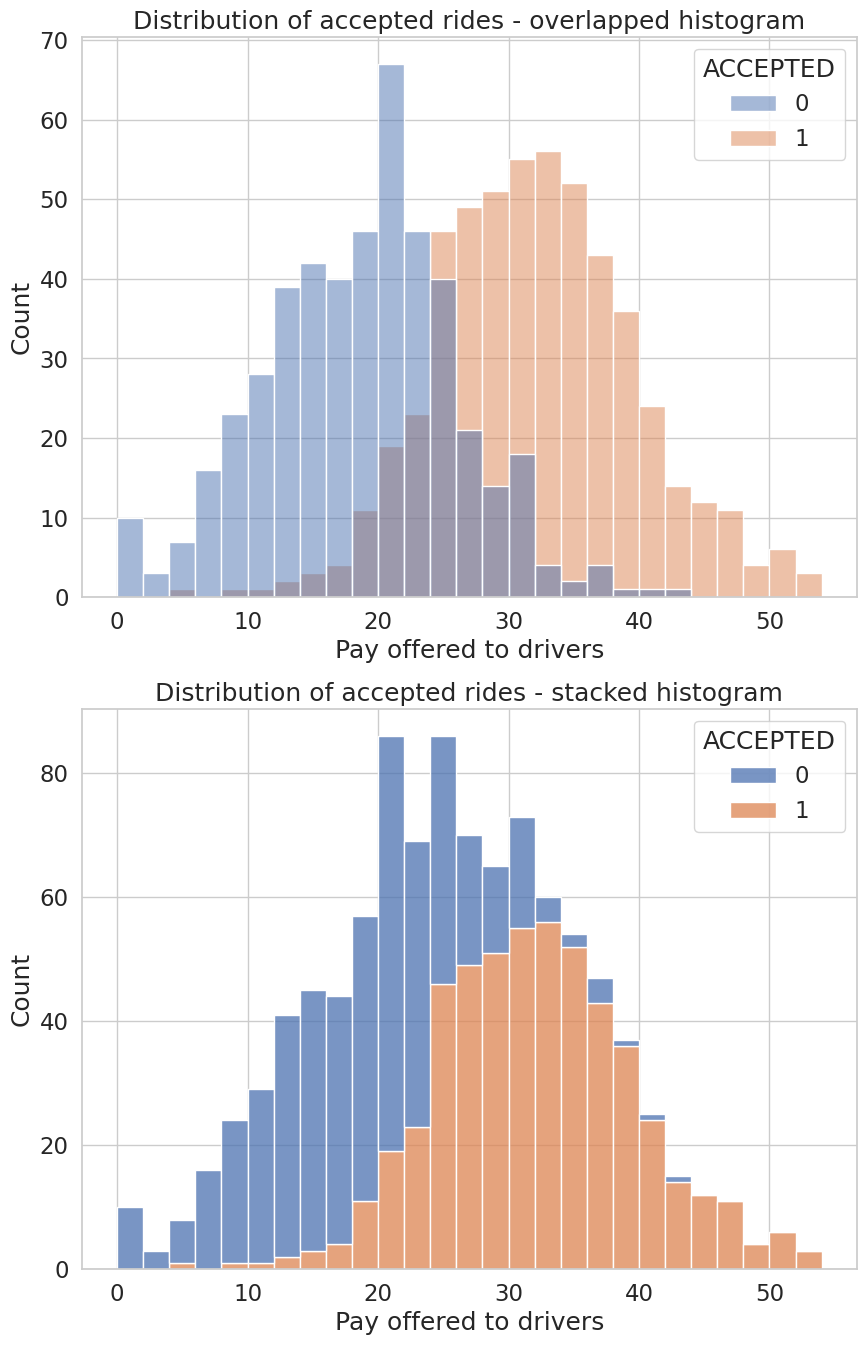

In [4]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(10,16))

sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', binwidth = 2, ax=ax[0])
ax[0]. set(xlabel='Pay offered to drivers', ylabel='Count', title="Distribution of accepted rides - overlapped histogram")

sns.histplot(data=pay_df, x = 'PAY', hue='ACCEPTED', multiple='stack', binwidth = 2, ax=ax[1])
ax[1]. set(xlabel='Pay offered to drivers', ylabel='Count', title="Distribution of accepted rides - stacked histogram")

plt.show()

The do useful statistics, we bin the data and find the acceptance rate and other useful metrics for each bin. I arbitrarily choose to cut the data in $2 bin width because it seems like the decent balance of granularity and accuracy.

In [5]:

# bin the data into pay ranges
pay_range = np.arange(0,56,2)
print('pay_range: ',pay_range)
pay_cut = pd.cut(pay_df['PAY'], pay_range, include_lowest=True)
pay_df['pay_range']= pay_cut 


# filter for accepted and rejected ride requests
accepted = pay_df[pay_df['ACCEPTED']==1]
rejected = pay_df[pay_df['ACCEPTED']==0]

pay_range:  [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54]


In [6]:
# with the new column pay_range, we can aggregrate the data into the pay_range bins with groupby

mean= pay_df.groupby(['pay_range']).mean()
counts = pay_df.groupby(['pay_range']).count()
revenue_df = np.round(accepted.groupby(['pay_range']).sum(), 2)

grouped_df = np.round(mean[['PAY', 'ACCEPTED']], 3)

# Do more calculations and create new columns
grouped_df['pay_range lower']= pay_range[:-1]
grouped_df['pay_range upper']= pay_range[1:]
grouped_df['pay_range center'] = (pay_range[:-1] + pay_range[1:])/2

grouped_df.rename({"PAY": "Avg Pay", "ACCEPTED": "Acceptance Rate"}, axis=1, inplace=True)

grouped_df['Revenue']= revenue_df['PAY']
grouped_df['Profit']= revenue_df['profit']
grouped_df['Accepted Rides']= revenue_df['ACCEPTED']
grouped_df['Ride Requests'] = counts['ACCEPTED']
grouped_df['Profit/Ride'] = np.round(grouped_df['Profit']/grouped_df['Accepted Rides'], 3)
grouped_df['Profit/Request'] =np.round( grouped_df['Profit']/grouped_df['Ride Requests'] ,3)
# Note that Profit/Request = Acceptance_rate * Profit/Ride


## Binned data and useful metrics

In [7]:
# here's the resulting DataFrame, not all the columns will be used
grouped_df

,Avg Pay,Acceptance Rate,pay_range lower,pay_range upper,pay_range center,Revenue,Profit,Accepted Rides,Ride Requests,Profit/Ride,Profit/Request
pay_range,,,,,,,,,,,
"(-0.001, 2.0]",0.268,0.000,0,2,1.0,0.00,0.00,0,10,NaN,0.000
"(2.0, 4.0]",3.579,0.000,2,4,3.0,0.00,0.00,0,3,NaN,0.000
"(4.0, 6.0]",4.971,0.125,4,6,5.0,5.40,24.60,1,8,24.600,3.075
"(6.0, 8.0]",6.935,0.000,6,8,7.0,0.00,0.00,0,16,NaN,0.000
"(8.0, 10.0]",9.077,0.042,8,10,9.0,9.00,21.00,1,24,21.000,0.875
"(10.0, 12.0]",11.026,0.034,10,12,11.0,11.59,18.41,1,29,18.410,0.635
"(12.0, 14.0]",13.085,0.049,12,14,13.0,25.21,34.79,2,41,17.395,0.849
"(14.0, 16.0]",14.979,0.067,14,16,15.0,45.78,44.22,3,45,14.740,0.983
"(16.0, 18.0]",16.864,0.091,16,18,17.0,67.75,52.25,4,44,13.062,1.188


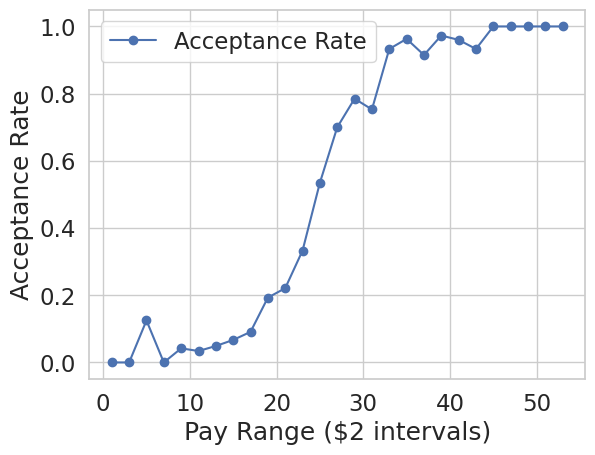

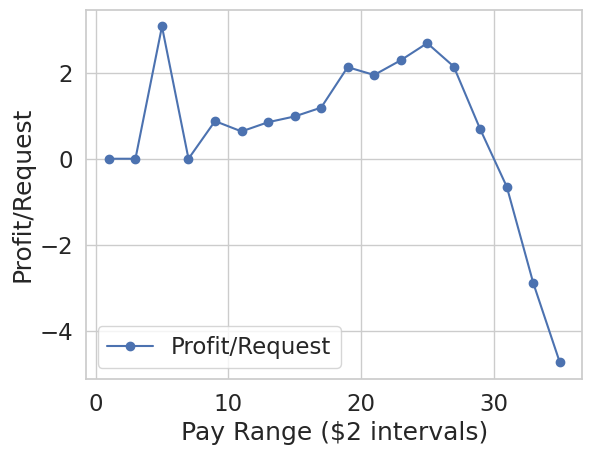

In [8]:
grouped_df.plot(y='Acceptance Rate', x='pay_range center', 
                marker='o', xlabel='Pay Range ($2 intervals)', ylabel= 'Acceptance Rate')
plt.grid(True)

grouped_df[:18].plot(y='Profit/Request', x='pay_range center', 
                marker='o', xlabel='Pay Range ($2 intervals)', ylabel= 'Profit/Request')
plt.grid(True)

## Modelling acceptance rate

Upon first glance, the acceptance rate vs pay range plot looks like a sigmoid function. I naively fit the data into a sigmoid function and get the best fit parameters. This will serve as a model that takes in driver pay as input and outputs the acceptance rate.

[-24.84534428   0.27059866]
[5.27855931e-03 9.12374675e-08]


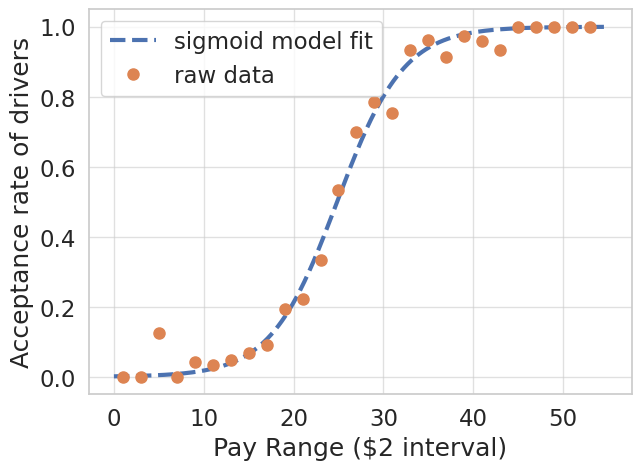

In [9]:
# extracting raw data from grouped_df
from scipy.optimize import curve_fit

x, y = grouped_df['pay_range center'].to_numpy(), grouped_df['Acceptance Rate'].to_numpy()

def sigmoid(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, -25,  0.25)

popt, pcov = curve_fit(sigmoid, x, y, p0=(-25.0, 0.25))

print(popt)
print(np.diag(pcov)**2)

x_s = np.arange(0,55,0.1)
y_s = sigmoid(x_s, popt[0], popt[1])

fig, ax = plt.subplots(figsize=(7,5))

plt.plot(x_s, y_s, '--', label='sigmoid model fit', lw=3)  # fit model
plt.plot(x,y, 'o', label='raw data', ms=8, lw=1)  # raw data
plt.xlabel('Pay Range ($2 interval)')
plt.ylabel('Acceptance rate of drivers')
plt.legend()
plt.grid(True, alpha = 0.6)
plt.show()

## Modelling profit/request

Here I model the profit/request metric in a similar manner. I use a generic polynomial fit the the 10th degree, since there is no obvious function that fits the curve.

[-1.88999784e-10  4.82348436e-08 -5.45608734e-06  3.59796495e-04
 -1.52994489e-02  4.37816352e-01 -8.52913179e+00  1.11572729e+02
 -9.37021477e+02  4.55813701e+03 -9.74510262e+03]


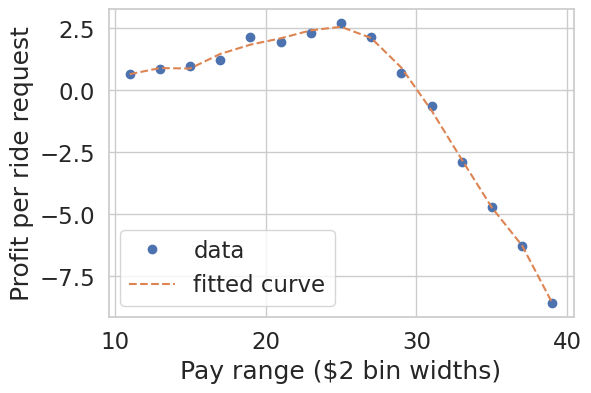

In [10]:
xf, yf = grouped_df['pay_range center'].to_numpy(), grouped_df['Profit/Request'].to_numpy()

x = xf[5:20]
y = yf[5:20]

z = np.polyfit(x,y,10)
print(z)
profit_pay_model = np.poly1d(z)

fig, ax = plt.subplots(figsize=(6,4))

n_end = 18
plt.plot(x,y, 'o', label='data')
plt.plot(x, profit_pay_model(x), '--', label='fitted curve')
plt.ylabel('Profit per ride request')
plt.xlabel('Pay range ($2 bin widths)')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# FINAL MODEL

# copy and pasted from the line above
def acceptance_rate_model(x, x0=-24.85, x_scale=0.27):
    return 1.0/(1.0+np.exp(-(x + x0)*x_scale) )

pay = 25 # input pay for drivers

print('Profit/Request:' , profit_pay_model(pay))
print('Acceptance Rate:', acceptance_rate_model(25))

Profit/Request: 2.544164592256493
Acceptance Rate: 0.5101236162660289


# Simulate rider requests with Poisson statistics

In [12]:
from scipy.stats import poisson
from scipy.stats import norm

[6 7 1 2 4]


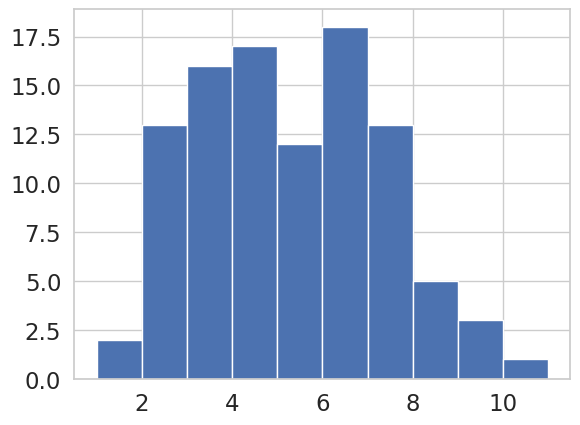

[ 1 10 97]


In [13]:
# Playing with poisson.rvs, random number generator based on the poisson distribution

random_poisson = poisson.rvs(mu=5, size=100)

print(random_poisson[:5])

fig, ax = plt.subplots(1,1)
ax.hist(random_poisson)
plt.show()

print(poisson.rvs(mu=[1,10,100], size=3))

In [14]:
random_poisson

array([ 6,  7,  1,  2,  4,  5,  5,  7,  7,  4,  7,  5,  6,  2,  6,  3,  2,
        6,  5,  2,  4,  2,  9,  4,  2,  4,  3,  5,  5,  9,  3,  8,  4,  3,
        8,  4,  2,  7,  3,  7,  3,  6,  8,  2,  5,  6,  4,  6,  2,  2,  3,
        7,  4,  3,  5,  1,  4,  9,  7,  5,  3,  4,  6,  3,  6,  5,  7,  8,
        4,  4,  3,  6,  4,  2,  6,  3,  7,  7,  3,  6,  6,  5,  3,  6, 11,
        4,  4,  4,  7,  8,  6,  6,  2,  3,  3,  2,  7,  6,  5,  6])

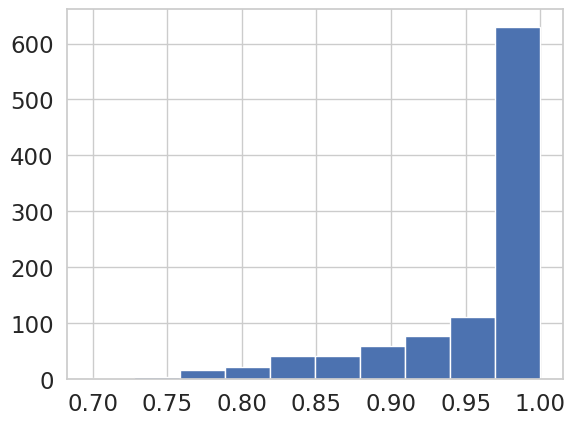

In [15]:
# capped_norm function creates a normal distrubtion with in the bounds [0,1]
# this is for simulating the acceptance rate that is used later

def capped_norm(mu = 0.25, size = 1000):
    random_norm = norm.rvs(mu, scale=0.1, size=size)
    capped = np.zeros(len(random_norm))
    for i, r in enumerate(random_norm):
        if r > 1:
            capped[i] = 1
        elif r < 0:
            capped[i] = 0
        else:
            capped[i] = r
            
    return capped
               
fig, ax = plt.subplots()
ax.hist(capped_norm(1, 1000))
plt.show()

In [16]:

def simulate_riders_array(n_riders=1000, init_mu=1, n_months=12, acceptance_rate=np.ones(12)*1.0, random_seed=None):
    '''
    This function simulates rider behaviour based using a random number generators 
    based on the poisson distribution. Each step (month) of the simulation depends on 
    the ride numbers of the previous step. 
    
    n_riders:        number of riders to simulate, each rider is a row in the output array
    init_mu:         the lambda parameter for the initial poisson distribution
    n_months:        number of iterations, each iteration is a column in the output array
    acceptance_rate: 
    random_seed:     random_state parameter for the poisson.rvs
    '''
    
    rider_array = np.zeros((n_riders, n_months)) # initializing array
    initial_requests = poisson.rvs(mu=np.ones(n_riders)*init_mu, size=n_riders, random_state=random_seed)
#     initial_matches = (np.rint(initial_requests * acceptance_rate[0])).astype(int)
    initial_matches = np.rint(initial_requests * capped_norm(acceptance_rate[0], n_riders))
    rider_array[:,0] = initial_matches
    
    for m in range(n_months)[1:n_months]:
        requests = poisson.rvs(mu = rider_array[:,m-1], size=n_riders, random_state=random_seed)
        matches = requests * capped_norm(acceptance_rate[m], n_riders)
#         rider_array[:,m] = matches
        rider_array[:,m] = np.rint(matches)
    
    return (np.rint(rider_array)).astype(int)


In [17]:
# testing the simulation

driverpay = np.array([30,30,30,30,30,28,28,28,25,25,25,25])
AR = sigmoid(driverpay)
rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*1.0)

# print(rides_sim[:20,:])

df_rides = pd.DataFrame(rides_sim)
total_rides = df_rides.sum()
first_month = df_rides[0]


print(total_rides.values)
riderpay = 35
profit = total_rides.values*(riderpay-driverpay)
print(profit)
print(profit.sum())

driverpay = np.array([35,35,35,32,30,28,28,28])
print(sigmoid(driverpay))
print(type(sigmoid(driverpay)))

[1026 1032 1036  999  937  877  814  759  727  676  640  623]
[5130 5160 5180 4995 4685 6139 5698 5313 7270 6760 6400 6230]
68960
[0.93937458 0.93937458 0.93937458 0.87330475 0.80067205 0.70067202
 0.70067202 0.70067202]
<class 'numpy.ndarray'>


In [18]:
rides_sorted = df_rides.sort_values(by=11, ascending = False)
# print(rides_sorted.info())
print(rides_sorted.describe().loc['std'])
# print(rides_sorted)

0     1.001162
1     1.423025
2     1.702234
3     1.883759
4     1.969495
5     2.013436
6     2.036554
7     2.076832
8     2.146411
9     2.073964
10    1.998598
11    2.084998
Name: std, dtype: float64


In [19]:
rides_sorted

,0,1,2,3,4,5,6,7,8,9,10,11
796,1,2,5,7,12,15,10,14,19,20,19,23
909,2,3,3,3,3,6,11,9,9,15,15,17
360,2,3,7,5,3,6,7,6,9,12,12,16
173,4,5,3,7,6,8,12,19,19,16,9,14
497,4,3,3,6,12,15,11,8,10,9,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,0,0,0,0,0,0,0,0,0
414,2,1,0,0,0,0,0,0,0,0,0,0
415,1,0,0,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0,0,0,0


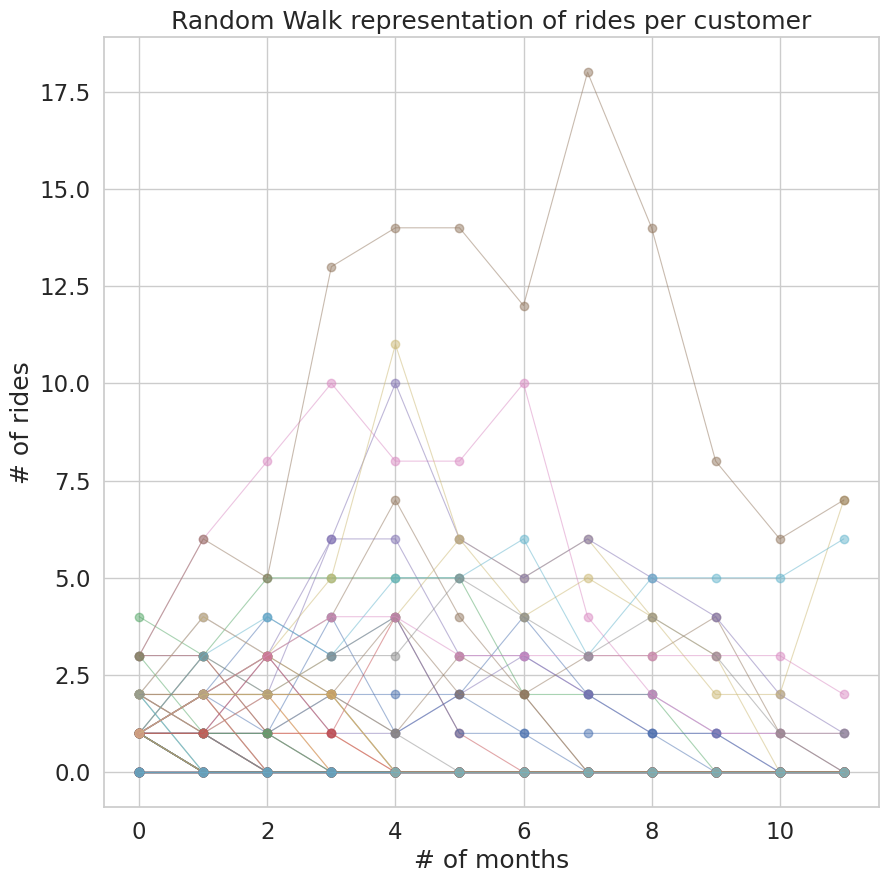

In [20]:
# Plotting the random walk, not very useful TBH

rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*0.9)

fig, ax = plt.subplots(figsize=(10,10))

for rs in rides_sim[:100]:
    plt.plot(rs, linewidth=0.8, marker='o',alpha=0.5)
plt.ylabel('# of rides')
plt.xlabel('# of months')  
plt.title('Random Walk representation of rides per customer')
plt.show()

In [21]:
# Creating the ride_stats DataFrame and storing it as csv

ride_stats = pd.DataFrame(index=np.arange(5))
# print(ride_stats)
for i in np.arange(0,12):
#     print(i)
    ride_stats = pd.merge(ride_stats, df_rides[i].value_counts(sort=False), how='outer', left_index=True, right_index=True)
    

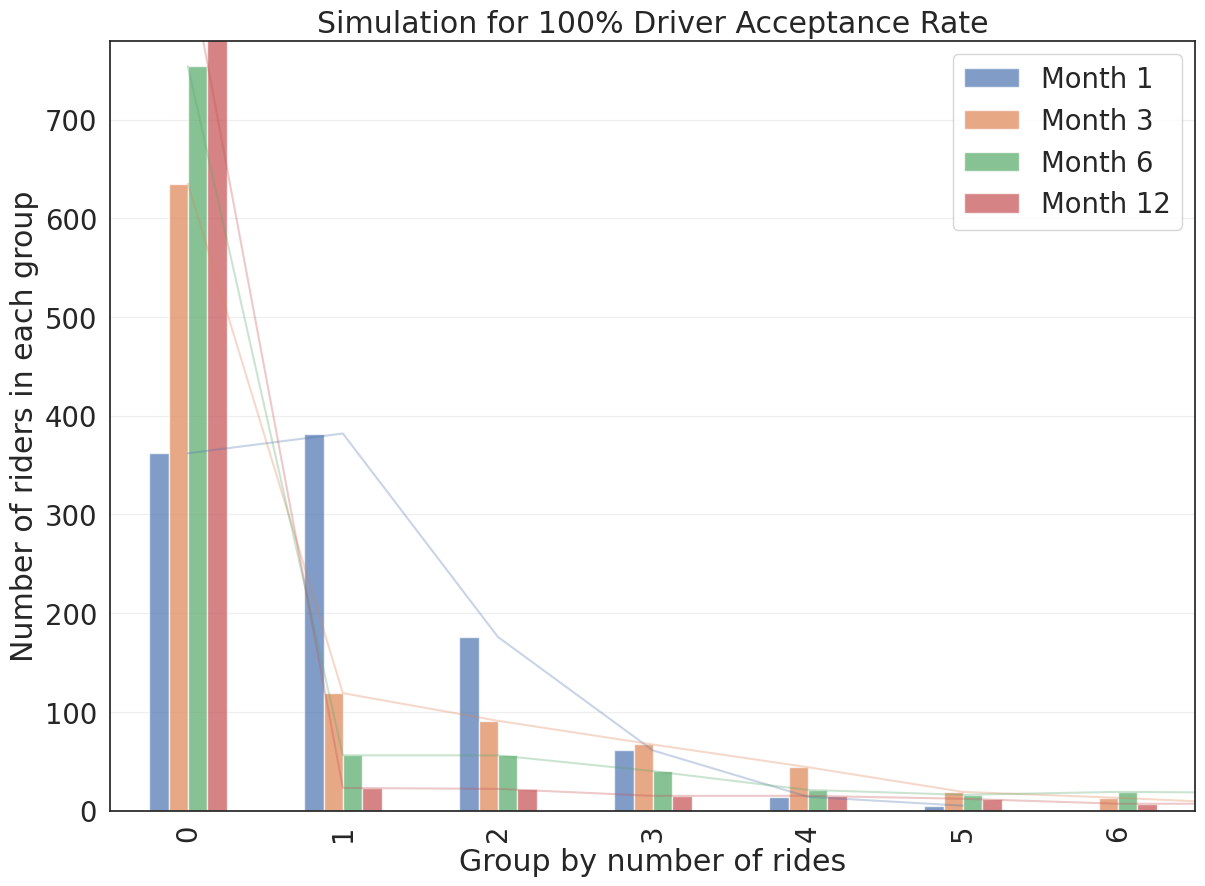

In [32]:
sns.set(font_scale=1.8)
sns.set_style("white")

# Plotting 100% AR

ride_stats = pd.read_csv('datasets/ride_stats_AR100.csv',index_col=0)
# print(ride_stats)

fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5','11']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group',
                    title='Simulation for 100% Driver Acceptance Rate',  legend=True)

ax.set_xlim([-0.5, 6.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

       0    1    2      3      4      5      6      7      8      9     10  \
0  545.0  785  898  947.0  969.0  991.0  995.0  997.0  998.0  999.0  999.0   
1  408.0  179   85   46.0   27.0    8.0    2.0    1.0    1.0    1.0    1.0   
2   45.0   32   13    6.0    4.0    1.0    3.0    2.0    1.0    NaN    NaN   
3    2.0    3    3    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    1    1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      11  
0  999.0  
1    1.0  
2    NaN  
3    NaN  
4    NaN  


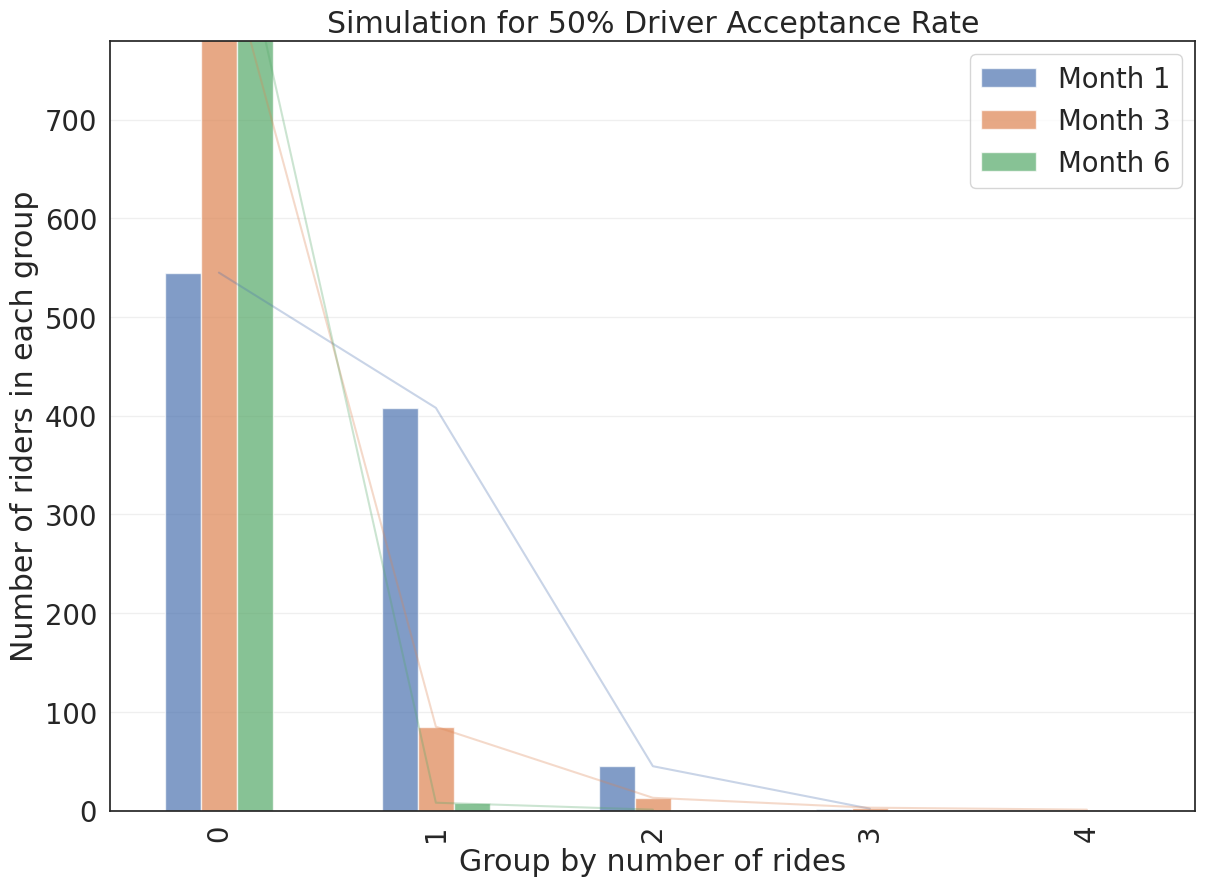

In [33]:
# Plotting 50% AR
ride_stats = pd.read_csv('datasets/ride_stats_AR50.csv',index_col=0)
print(ride_stats)
fig, ax = plt.subplots(figsize=(14,10))

ride_stats = ride_stats[['0','2','5']]
ride_stats.rename(columns={'0':'Month 1', '2':'Month 3', '5':'Month 6', '11':'Month 12'}, inplace=True)

ride_stats.plot.line(alpha=0.3, ax=ax, legend=False)
ride_stats.plot.bar(alpha=0.7, ax=ax, 
                    xlabel='Group by number of rides', 
                    ylabel='Number of riders in each group', 
                    title='Simulation for 50% Driver Acceptance Rate' ,legend=True)

ax.set_xlim([-0.5, 4.5])
ax.set_ylim([0,780])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [24]:
# Showing the inconsistencies of the poisson.rvs random number generator

df_summed_rides = pd.DataFrame()
cols = ['simulation_1', 'simulation_2', 'simulation_3', 'simulation_4', 'simulation_5']
for col in cols:
    rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*1.0)
    df_summed_rides[col]= np.sum(rides_sim, axis=0) 

df_summed_rides.T

,0,1,2,3,4,5,6,7,8,9,10,11
simulation_1,929,867,887,857,830,810,791,750,722,708,693,697
simulation_2,985,971,910,877,831,765,716,712,704,729,701,672
simulation_3,979,967,957,944,920,876,864,832,778,732,703,751
simulation_4,1002,970,973,936,916,916,896,863,847,772,796,741
simulation_5,1013,1030,1045,985,962,931,862,828,762,738,678,716


## Total rides per month vs Acceptance Rate (AR)

In [35]:
df_summed_rides = pd.DataFrame(index=list(range(12))) # initialize empty DF
cols = ['100% AR', '90% AR', '75% AR', '50% AR'] # columns of DF
AR = [1.0, 0.90, 0.75, 0.5]  # acceptance rates
simulation_runs=10

for i in range(4):
    rides_sim = np.zeros((1000, 12))
    for s in range(simulation_runs):
        
        rides_sim += simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR[i])
        
    avg_rides_sim = rides_sim/float(simulation_runs)
    df_summed_rides[cols[i]]= np.sum(avg_rides_sim, axis=0) 

df_summed_rides_T = df_summed_rides.T
df_summed_rides_T['12-month total'] = df_summed_rides_T.sum(axis=1)
df_summed_rides_T

,0,1,2,3,4,5,6,7,8,9,10,11,12-month total
100% AR,982.1,979.9,959.4,941.4,922.9,912.2,887.0,842.7,803.9,781.1,751.5,724.6,10488.7
90% AR,953.8,882.3,819.0,757.7,699.3,631.5,575.9,527.7,481.0,427.3,392.8,367.9,7516.2
75% AR,830.6,677.1,539.8,427.7,331.8,254.0,192.2,152.0,119.2,87.8,65.4,52.0,3729.6
50% AR,505.7,251.5,126.2,63.7,30.9,16.7,8.7,3.8,2.1,1.2,0.9,0.4,1011.8


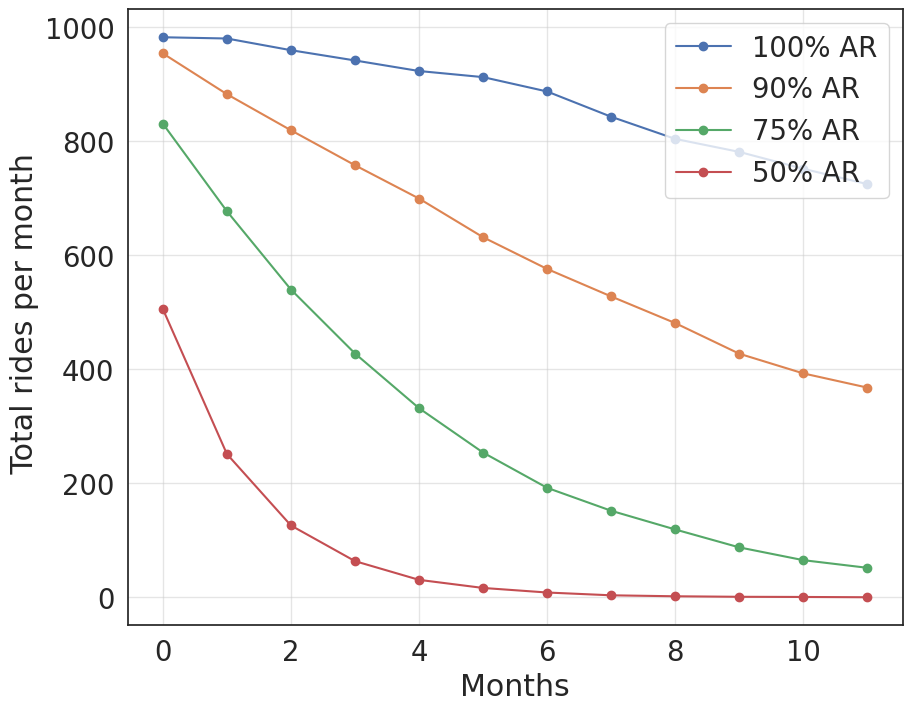

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

df_summed_rides.plot(ax=ax, marker='o')
ax.set(xlabel= 'Months', ylabel=' Total rides per month')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right')
plt.show()

In [38]:
df_summed_rides = pd.DataFrame(index=list(range(12))) # initialize empty DF
cols = ['100%', '90%', '80%', '70%', '60%', '50%', '40%', '30%'] # columns of DF
AR = [1.0, 0.90, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]  # acceptance rates
simulation_runs=10

for i in range(len(AR)):
    rides_sim = np.zeros((1000, 12))
    for s in range(simulation_runs):
        
        rides_sim += simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR[i])
        
    avg_rides_sim = rides_sim/float(simulation_runs)
    df_summed_rides[cols[i]]= np.sum(avg_rides_sim, axis=0) 

In [39]:
df_summed_rides_T = df_summed_rides.T
df_summed_rides_T['12-month total'] = df_summed_rides_T.sum(axis=1)
df_summed_rides_T['12-month total']

100%    10214.7
90%      7726.8
80%      4861.2
70%      3000.0
60%      1848.6
50%      1007.1
40%       506.5
30%       277.8
Name: 12-month total, dtype: float64

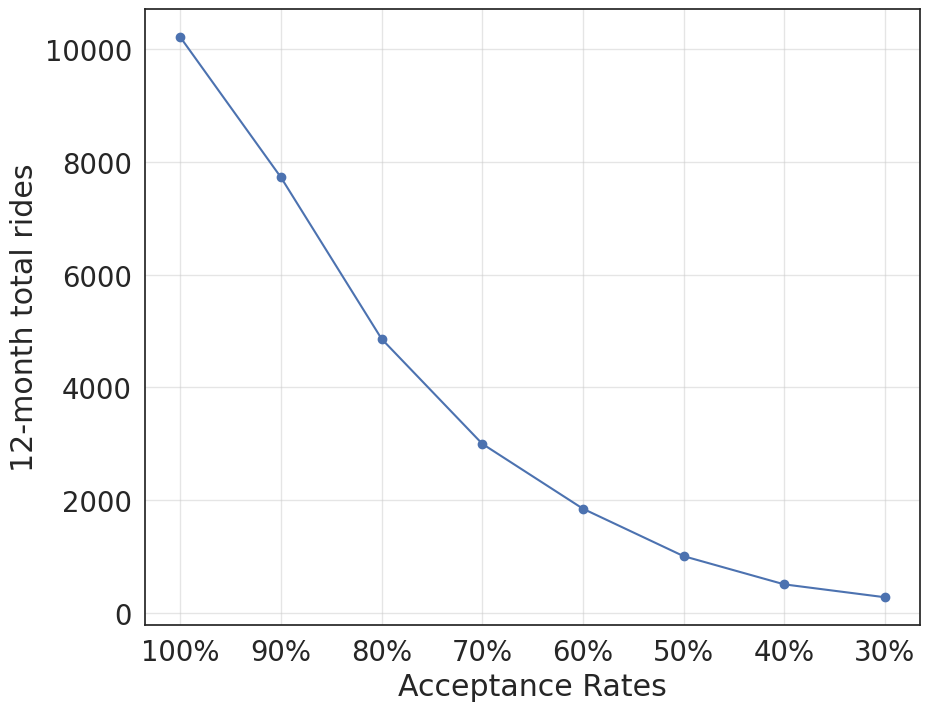

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

df_summed_rides_T['12-month total'].plot(ax=ax, marker='o')
ax.set(xlabel= 'Acceptance Rates', ylabel='12-month total rides')
plt.grid(True, alpha=0.5)
# plt.legend(loc='upper right')
plt.show()

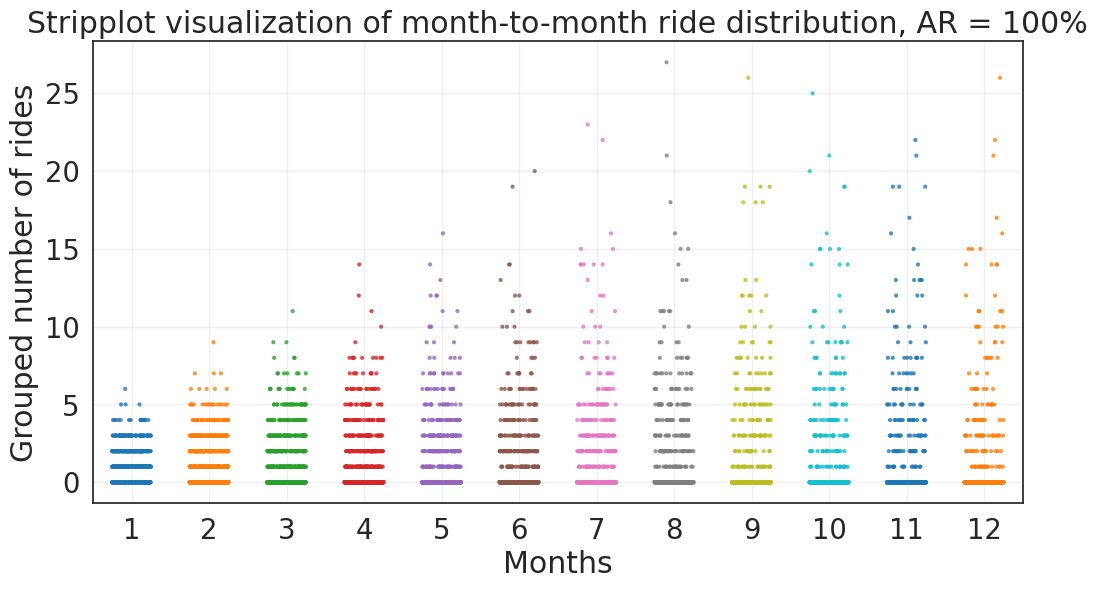

In [43]:
# Stripplot visualization of month-to-month ride distribution
AR = 1

rides_sim = simulate_riders_array(n_riders=1000, init_mu=1, acceptance_rate=np.ones(12)*AR)
# print(rides_df[[0,2,5,11]])
rides_df=pd.DataFrame(rides_sim, columns=list(range(1,13)))
df = rides_df[list(range(1,13))]

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=df, size=3, alpha=0.8, palette = 'tab10', jitter=0.25 , edgecolor='gray', orient='v', ax=ax)
ax.grid(True, axis='both', which='both', alpha =0.3)
ax.set(xlabel='Months', ylabel='Grouped number of rides', 
       title='Stripplot visualization of month-to-month ride distribution, AR = {}%'.format(AR*100))
plt.show()

In [52]:
a=32
print(type(a))
b = float(a)
print(type(b))

<class 'int'>
<class 'float'>


In [54]:
def simulate_monthly_earnings(n_riders=1000, 
                              simulation_runs=100,
                              n_months=12, 
                              init_mu=1,
                              driver_pay=np.ones(12)*25, 
                              rider_pay=30.0, 
                              verbose=False, 
                              random_seed=None):
    
    '''
    Using our simulate_riders_array() function, we can calculate the monthly earnings for the company.
    
    Args:
        n_riders (int): initial number of riders
        simulation_runs (int): number of times to run simulate_riders_array
        n_months (int): number of months (steps) to simulate
        driver_pay (ndarray): array should have n_months elements, which determines acceptance rate 
                            based on the predetermined model
        rider_pay (int): 30 by default, but it can be changed
        random_seed (int): None
        verbose (boolean): If True, prints monthly driver pay and corresponding acceptance rate
    
    Returns:
        avg_rides_df (pd.DataFrame): DataFrame of the simulated rides averaged over number of simulation_runs
        monthly_total_rides (pd.Series): Total rides of every month
        monthly_earnings (np.ndarray): monthly_total_rides * (rider_pay - driver_pay)
    '''
    
    # acceptance_rate_model() is predefined earlier
    AR = acceptance_rate_model(driver_pay)

    rides_array = np.zeros((n_riders, n_months))

    # We can run the simulation more than once and average the results for better statistical convergence
    for _ in range(simulation_runs):
        rides_array += simulate_riders_array(n_riders=n_riders, 
                                             n_months=n_months, 
                                             init_mu=init_mu, 
                                             acceptance_rate=AR, 
                                             random_seed=random_seed)
        
    # divide by number of simulations to get an average, then load it into a DF
    avg_rides_df = pd.DataFrame(rides_array/float(simulation_runs))  # avg_rides_df has continuous values instead of integers
    
    monthly_total_rides = avg_rides_df.sum().values  # sums over each month column
    monthly_earnings = monthly_total_rides *(rider_pay - driver_pay) 
    monthly_df = pd.DataFrame({'Driver Pay': driver_pay,
                               'AR': np.round(AR,2),
                                'Monthly Rides':monthly_total_rides, 
                               'Monthly Earnings': monthly_earnings })
    
    monthly_df['Month Index'] = list(range(1,n_months+1))
    monthly_df.set_index('Month Index', inplace=True)
    
    # prints some useful
    if verbose:
        print('Monthly driver pay:')
        print(np.round(driver_pay,2))
        print('Monthly acceptance rate:')
        print(np.round(AR,2))
    
    return avg_rides_df, monthly_df
    

In [55]:
# testing the simulate_monthly_earnings function
testing=True

if testing:
    sim_months = 12  # number of months to simulate
    rider_pay = 30.0
    driver_pay=np.linspace(30, 19, sim_months)
#     driver_pay = np.ones(sim_months)*25
    print(driver_pay)
    print(len(driver_pay))
    all_rides = []
    all_earnings = []
    
    empty_df = pd.DataFrame()
    for _ in range(1):

        avg_rides_df, monthly_df = simulate_monthly_earnings(n_riders=1000,
                                                            n_months=sim_months,
                                                            rider_pay=rider_pay, 
                                                            driver_pay=driver_pay, 
                                                            simulation_runs=100)
                                                        
        monthly_df = np.round(monthly_df,2)
        
        print(monthly_df)
        
        total_df = monthly_df.sum()
        print(total_df)
#         print('Total rides ({} months):'.format(sim_months), total_rides)
#         print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))
        all_rides.append(total_df['Monthly Rides'])
        all_earnings.append(total_df['Monthly Earnings'])
        empty_df += monthly_df

        
#     print(empty_df)
    print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
    print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
    print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))


[30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19.]
12
             Driver Pay    AR  Monthly Rides  Monthly Earnings
Month Index                                                   
1                  30.0  0.80         889.05              0.00
2                  29.0  0.75         718.76            718.76
3                  28.0  0.70         531.72           1063.44
4                  27.0  0.64         360.10           1080.30
5                  26.0  0.58         216.72            866.88
6                  25.0  0.51         111.95            559.75
7                  24.0  0.44          46.96            281.76
8                  23.0  0.38          15.64            109.48
9                  22.0  0.32           3.73             29.84
10                 21.0  0.26           0.60              5.40
11                 20.0  0.21           0.08              0.80
12                 19.0  0.17           0.00              0.00
Driver Pay           294.00
AR                     5.76
Monthly R

In [32]:
monthly_df

,Driver Pay,AR,Monthly Rides,Monthly Earnings
Month Index,,,,
1,30.0,0.80,887.75,0.00
2,29.0,0.75,717.84,717.84
3,28.0,0.70,529.74,1059.48
4,27.0,0.64,359.37,1078.11
5,26.0,0.58,219.20,876.80
6,25.0,0.51,112.71,563.55
7,24.0,0.44,47.87,287.22
8,23.0,0.38,15.19,106.33
9,22.0,0.32,3.81,30.48


In [33]:
monthly_df[['Monthly Rides', 'Monthly Earnings']].sum()

Monthly Rides       2894.19
Monthly Earnings    4726.29
dtype: float64

In [34]:
def earnings_optimizer(driver_pay, rider_pay=30.0, simulation_runs=100, verbose=False):
    '''
    Args:
        driver_pay (ndarray)
        rider_pay (int or ndarray)
        simulation_runs (int)
        verbose (boolean)
        
    Returns:
        np.mean(all_rides): a single number that is the total rides, averaged over many simulations,
                            in the simulated time period of n_months
        np.mean(all_earnings): a single number that represents the total earnings for the same simulation
        
    '''
    
    sim_months = len(driver_pay)
    all_rides = []
    all_earnings = []

    for _ in range(10): 
        rides_df, monthly_df = simulate_monthly_earnings(
                                                        n_months=sim_months,
                                                        rider_pay=rider_pay, 
                                                        driver_pay=driver_pay, 
                                                        simulation_runs=simulation_runs)
        total_df = monthly_df[['Monthly Rides', 'Monthly Earnings']].sum()
        all_rides.append(total_df['Monthly Rides'])
        all_earnings.append(total_df['Monthly Earnings'])
        
        if verbose:
            print('Total rides ({} months):'.format(sim_months), total_rides)
            print('Total earnings ({} months):'.format(sim_months), np.round(total_earnings))

    if verbose:
        print('Driver pay: {}'.format(driver_pay))
        print('{} months'.format(sim_months))
        print('Avg total rides {} +/- {}'.format(np.mean(all_rides), np.std(all_rides)) )
        print('Avg total earnings {} +/- {}'.format(np.mean(all_earnings), np.std(all_earnings)) )
        print('Earnings/ride {}'.format(np.mean(all_earnings)/np.mean(all_rides)))
    
    return np.mean(all_rides), np.mean(all_earnings)

In [35]:
# initialize empty lists, driver pay and number of months

n_months=24

pay=[]
rides=[]
earnings=[]
driver_pay = np.concatenate([np.arange(15,24,3), np.arange(24,26,0.2), np.arange(26,28,0.2), np.arange(28,31,2)])

print('Driver Pay($), # of Rides, Total Earnings($)')
for i, d in enumerate(driver_pay):
    
    avg_rides, avg_earnings = earnings_optimizer(np.ones(n_months)*d, rider_pay=30, simulation_runs=50)
    pay.append(d)
    rides.append(avg_rides)
    earnings.append(avg_earnings)
    
    print(np.round(pay[i], 2), np.round(rides[i], 2), np.round(earnings[i], 2))
    
# 26.8 2202.29 7047.32

Driver Pay($), # of Rides, Total Earnings($)
15.0 21.38 320.73
18.0 61.08 732.94
21.0 212.92 1916.3
24.0 668.95 4013.68
24.2 733.21 4252.63
24.4 808.1 4525.35
24.6 887.33 4791.56
24.8 973.69 5063.19
25.0 1075.69 5378.44
25.2 1182.41 5675.58
25.4 1296.99 5966.17
25.6 1417.17 6235.56
25.8 1541.0 6472.2
26.0 1667.81 6671.23
26.2 1798.82 6835.51
26.4 1931.67 6954.0
26.6 2075.4 7056.35
26.8 2196.94 7030.2
27.0 2339.85 7019.55
27.2 2482.62 6951.32
27.4 2626.9 6829.93
27.6 2786.99 6688.77
27.8 2928.12 6441.86
28.0 3107.09 6214.18
30.0 5367.86 0.0


In [36]:
total_df = pd.DataFrame({'Fixed Driver Pay':pay, f'{n_months}-M Total Rides':rides, f'{n_months}-M Total Earnings':earnings })
total_df

,Fixed Driver Pay,24-M Total Rides,24-M Total Earnings
0,15.0,21.382,320.7300
1,18.0,61.078,732.9360
2,21.0,212.922,1916.2980
3,24.0,668.946,4013.6760
4,24.2,733.212,4252.6296
5,24.4,808.098,4525.3488
6,24.6,887.326,4791.5604
7,24.8,973.690,5063.1880
8,25.0,1075.688,5378.4400
9,25.2,1182.412,5675.5776


In [37]:
# total_df.to_csv('earnings_max_24M.csv')

In [38]:
df1 = pd.read_csv('datasets/earnings_max_1M.csv', usecols=[1,2,3])
df3 = pd.read_csv('datasets/earnings_max_3M.csv', usecols=[1,2,3])
df6 = pd.read_csv('datasets/earnings_max_6M.csv', usecols=[1,2,3])
df12 = pd.read_csv('datasets/earnings_max_12M.csv', usecols=[1,2,3])
df24 = pd.read_csv('datasets/earnings_max_24M.csv', usecols=[1,2,3])

In [39]:
df12

,Fixed Driver Pay,12-M Total Rides,12-M Total Earnings
0,15.0,21.762,326.4300
1,18.0,61.064,732.7680
2,21.0,214.452,1930.0680
3,24.0,671.632,4029.7920
4,24.2,730.484,4236.8072
5,24.4,803.588,4500.0928
6,24.6,883.660,4771.7640
7,24.8,976.106,5075.7512
8,25.0,1068.308,5341.5400
9,25.2,1178.162,5655.1776


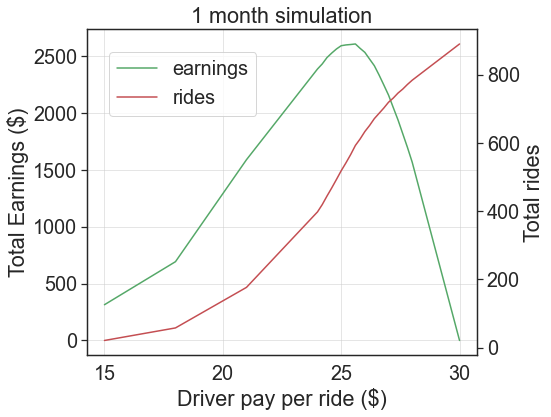

In [40]:
fig, ax1 = plt.subplots(figsize = (7,6))
ax2 = ax1.twinx()

ax1.plot(df1['Fixed Driver Pay'], df1['1-M Total Earnings'], label='earnings', color = 'g')
ax2.plot(df1['Fixed Driver Pay'], df1['1-M Total Rides'], label='rides', color = 'r')

ax1.set_xlabel('Driver pay per ride ($)')
ax1.set_ylabel('Total Earnings ($)')
ax2.set_ylabel('Total rides')
ax1.set_title('{} month simulation'.format(1))

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
ax1.grid(True, alpha=0.5)
plt.show()

In [41]:
# print(pay, earnings, rides)
data_dict= {'pay':pay, 'rides': rides, 'earnings': earnings}
# print(data_dict)

In [42]:
m12_earnings_sim = pd.DataFrame(data_dict)
m12_earnings_sim.to_csv('m12_earnings_sim.csv')
print(m12_earnings_sim)

     pay     rides   earnings
0   15.0    21.382   320.7300
1   18.0    61.078   732.9360
2   21.0   212.922  1916.2980
3   24.0   668.946  4013.6760
4   24.2   733.212  4252.6296
5   24.4   808.098  4525.3488
6   24.6   887.326  4791.5604
7   24.8   973.690  5063.1880
8   25.0  1075.688  5378.4400
9   25.2  1182.412  5675.5776
10  25.4  1296.994  5966.1724
11  25.6  1417.172  6235.5568
12  25.8  1541.000  6472.2000
13  26.0  1667.808  6671.2320
14  26.2  1798.818  6835.5084
15  26.4  1931.666  6953.9976
16  26.6  2075.396  7056.3464
17  26.8  2196.938  7030.2016
18  27.0  2339.850  7019.5500
19  27.2  2482.616  6951.3248
20  27.4  2626.898  6829.9348
21  27.6  2786.986  6688.7664
22  27.8  2928.120  6441.8640
23  28.0  3107.088  6214.1760
24  30.0  5367.860     0.0000


In [43]:
# simulating dynamic pay structures

# initialize empty lists and driver_pay array for simulation
pay=[]
rides=[]
earnings=[]

n_months=6 

driver_pays =[np.linspace(28, 25.5, n_months),
              np.linspace(27.5, 25.5, n_months),
              np.linspace(27, 25.5, n_months),
              np.linspace(26.5, 25.5, n_months),
              np.linspace(26, 25.5, n_months)]

optimal_driver_pay = np.linspace(27, 25.5, n_months)

for i, dp in enumerate(driver_paysnjh):
    print(dp)
    avg_rides, avg_earnings = profit_optimizer(dp, rider_pay=30)
    pay.append(dp)
    rides.append(avg_rides)
    earnings.append(avg_earnings)
    print(np.round(rides[i], 2), np.round(earnings[i], 2))


NameError: name 'driver_paysnjh' is not defined

In [ ]:
# Driver pay and acceptance rate DataFrame

dp = np.arange(15,35)
ar = acceptance_rate_model(dp)

dp_ar = pd.DataFrame({'Driver Pay': np.round(dp), 'AR': np.round(ar,2)})

print(dp_ar)

plt.plot(dp, acceptance_rate_model(dp), '-o')
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
dp_ar.T

## Attempt at using scipy.optimize.minimize

In [ ]:

from scipy.optimize import minimize

# x_start = np.array([30.,30.,28.,22.])
x_start = np.ones(3)*28.0
print(x_start)
bounds = [(20.0, 30.0), (20.0, 30.0),(20.0, 30.0)]

results = minimize(profit_optimizer, x_start,
                  bounds = bounds)

In [ ]:
print(results)

# Simulate using non-random poisson.pmf

In [ ]:
n=1000
n_months = 12

# k represents the number of rides, it's to be inputted into poisson.pmf
# k=40 is a bit high, but it doesn't hurt to overestimate 
k_range = list(range(40)) 
print("k_range: ", k_range)

# initial distribution of first 1000 riders' request
A_init = np.round(n*poisson.pmf(k=k_range, mu=1), 4)

L = [A_init] 
Requests = A_init*k_range
print(np.round(Requests))


for m in range(n_months-1):
    
    A = np.zeros(len(k_range))
    
    for i in k_range:
        
        A += np.round(L[m][i]*poisson.pmf(k=k_range, mu=i), decimals=4)
    
    L.append(A)
#     print(A)
#     print(A.sum())

In [ ]:
print(np.round(Requests))

Requests[1]


In [ ]:
for m in range(12):
#     print(np.round(L[m].sum(),0))
    print(np.round(L[m][:30]))

In [ ]:
# Total Number of Rides per month

# print(np.round(L[0]))
rides_total= 0
for m in range(n_months):    
    rides_per_group = np.round(L[m])*k_range
#     print(rides_per_group)
    
    rides_total += np.sum(rides_per_group)
    print(np.sum(rides_per_group), rides_total)
    
print('rides_total=', rides_total)